Loading data from:
  C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\4-oy\6-project\binance.com\data\final_training_data\X_balanced.csv
  C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\4-oy\6-project\binance.com\data\final_training_data\y_balanced.csv...
Features shape: (10185, 13), Target shape: (10185,)
Data successfully split.

--- Training RandomForestClassifier ---
Training completed in 0 days 00:00:00.141424

✅ Model saved to: C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\4-oy\6-project\binance.com\offline_testing\random_forest_model.joblib

📊 RandomForestClassifier - Train vs. Test Score Comparison for: JUP_Target_MultiClass
╒══════════╤═══════════════╤══════════════╕
│ Metric   │   Train Score │   Test Score │
╞══════════╪═══════════════╪══════════════╡
│ Accuracy │        0.7653 │       0.3932 │
├──────────┼───────────────┼──────────────┤
│ F1-macro │        0.7685 │       0.3821 │
╘══════════╧═══════════════╧══════════════╛

💡 Interpretation Guid

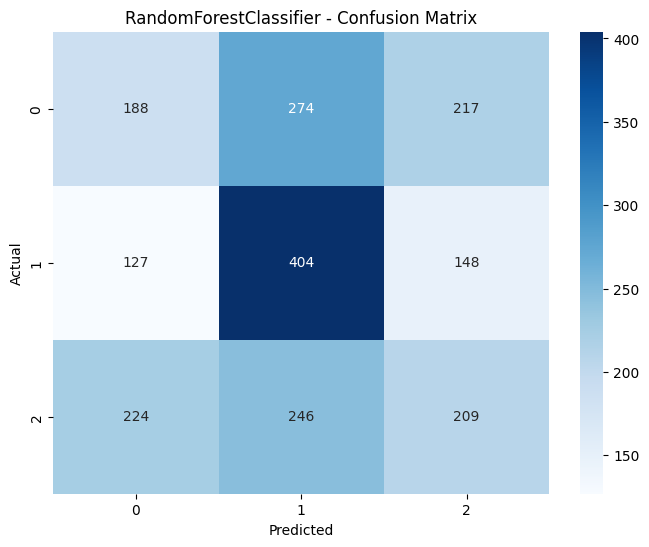


Classification Report (per class):
              precision    recall  f1-score   support

           0       0.35      0.28      0.31       679
           1       0.44      0.59      0.50       679
           2       0.36      0.31      0.33       679

    accuracy                           0.39      2037
   macro avg       0.38      0.39      0.38      2037
weighted avg       0.38      0.39      0.38      2037



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate  
import joblib  
import os


X_FILE = r'C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\4-oy\6-project\binance.com\data\final_training_data\X_balanced.csv'
Y_FILE = r'C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\4-oy\6-project\binance.com\data\final_training_data\y_balanced.csv'
MODEL_SAVE_PATH = r'C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\4-oy\6-project\binance.com\offline_testing\random_forest_model.joblib'
TEST_SIZE = 0.2
RANDOM_STATE = 42


os.makedirs(os.path.dirname(MODEL_SAVE_PATH), exist_ok=True)


def load_and_split_data(X_file, y_file, test_size, random_state):
    """Load features and target, then split into train/test sets."""
    print(f"Loading data from:\n  {X_file}\n  {y_file}...")
    try:
        X = pd.read_csv(X_file)
        y_df = pd.read_csv(y_file)
        target_column = y_df.columns[0]
        y = y_df[target_column]
    except FileNotFoundError:
        print("Error: CSV files not found. Check file paths.")
        return None, None, None, None, None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None, None, None, None

    print(f"Features shape: {X.shape}, Target shape: {y.shape}")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    print("Data successfully split.\n")
    return X_train, X_test, y_train, y_test, target_column

def score_model(model, X_train, X_test, y_train, y_test):
    """Train model and return evaluation metrics."""
    model_name = type(model).__name__
    print(f"--- Training {model_name} ---")
    start_time = pd.Timestamp.now()
    model.fit(X_train, y_train)
    end_time = pd.Timestamp.now()
    print(f"Training completed in {end_time - start_time}")

    results = {}
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results['Train Accuracy'] = accuracy_score(y_train, y_train_pred)
    results['Train F1-macro'] = f1_score(y_train, y_train_pred, average='macro')
    results['Test Accuracy'] = accuracy_score(y_test, y_test_pred)
    results['Test F1-macro'] = f1_score(y_test, y_test_pred, average='macro')
    results['y_test_pred'] = y_test_pred  # For confusion matrix

    return results

def display_results(model_name, results, y_test, target_column):
    """Display train/test scores and guidance."""
    table_data = [
        ["Accuracy", f"{results['Train Accuracy']:.4f}", f"{results['Test Accuracy']:.4f}"],
        ["F1-macro", f"{results['Train F1-macro']:.4f}", f"{results['Test F1-macro']:.4f}"]
    ]
    print("\n" + "="*70)
    print(f"📊 {model_name} - Train vs. Test Score Comparison for: {target_column}")
    print("="*70)
    print(tabulate(table_data, headers=["Metric", "Train Score", "Test Score"], tablefmt="fancy_grid"))

    
    print("\n💡 Interpretation Guide:")
    if results['Train Accuracy'] > results['Test Accuracy'] + 0.1:
        print("   - Overfitting detected: Train >> Test.")
    elif results['Train Accuracy'] < 0.5 and results['Test Accuracy'] < 0.5:
        print("   - Underfitting detected: Both scores low.")
    else:
        print("   - Model generalizes well (no severe overfitting).")

    
    cm = confusion_matrix(y_test, results['y_test_pred'])
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    
    print("\nClassification Report (per class):")
    print(classification_report(y_test, results['y_test_pred']))


if __name__ == "__main__":
    
    X_train, X_test, y_train, y_test, target_column = load_and_split_data(
        X_FILE, Y_FILE, TEST_SIZE, RANDOM_STATE
    )
    if X_train is None:
        exit()

    
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=RANDOM_STATE,
        n_jobs=-1
    )

    
    results = score_model(model, X_train, X_test, y_train, y_test)

   
    joblib.dump(model, MODEL_SAVE_PATH)
    print(f"\n✅ Model saved to: {MODEL_SAVE_PATH}")

   
    display_results(type(model).__name__, results, y_test, target_column)

   


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from joblib import load


X_path = r"C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\4-oy\6-project\binance.com\data\final_training_data\X_balanced.csv"
y_path = r"C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\4-oy\6-project\binance.com\data\final_training_data\y_balanced.csv"
model_path = r"C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\4-oy\6-project\binance.com\offline_testing\random_forest_model.joblib"

try:
    X_full = pd.read_csv(X_path)
    y_full = pd.read_csv(y_path).squeeze()  
except FileNotFoundError:
    print("Error: X_balanced.csv or y_balanced.csv not found. Check file paths.")
    exit()

print("Loaded Features (X_full Head):")
print(X_full.head())
print("\nTarget Classes (y_full Unique Values):", y_full.unique())


X_train_model_data = X_full.iloc[:-1]
y_train_model_data = y_full.iloc[:-1]
X_unseen_original = X_full.iloc[-1:].copy()


X_train, X_test, y_train, y_test = train_test_split(
    X_train_model_data,
    y_train_model_data,
    test_size=0.2,
    random_state=42,
    stratify=y_train_model_data
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_unseen_scaled = scaler.transform(X_unseen_original)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


y_test_pred = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)


pred_target_class = model.predict(X_unseen_scaled)[0]
pred_proba = model.predict_proba(X_unseen_scaled)[0]

unseen_features = X_unseen_original.iloc[0].to_dict()
unseen_time_index = X_unseen_original.index[0]


print("\n" + "="*50)
print("--- Offline (Unseen) Data Point Prediction ---")
print(f"Data Point Index (Simulated Unseen): {unseen_time_index}")
print(f"Key Features Sample (JUP_Close): {unseen_features.get('JUP_Close'):.4f}, (FE_JUP_RSI_14): {unseen_features.get('FE_JUP_RSI_14'):.2f}")
print("="*50)
print(f"Predicted Target Class: {int(pred_target_class)}")
print(f"Prediction Probabilities (for classes 0, 1, 2...): {pred_proba}")
print(f"\nModel Evaluation Context (Test Set Accuracy): {test_accuracy:.4f}")

print("\nInterpretation:")
print(f"The model predicts class '{int(pred_target_class)}' for this unseen data point.")
print(f"Test set accuracy: {test_accuracy:.2%}")


Loaded Features (X_full Head):
   FE_JUP_Volatility_20  FE_JUP_Hourly_Range  FE_JUP_Close_vs_SMA10  JUP_High  \
0              0.603222             1.102440               0.032630    1.0825   
1              0.630904             0.862544               0.018393    1.0696   
2              0.816310             1.653995              -0.009928    1.0590   
3              0.817390             0.397918              -0.014544    1.0352   
4              0.850019             0.961429              -0.025515    1.0286   

   JUP_Low  FE_JUP_Volatility_5  FE_JUP_SMA_10  FE_JUP_Return_Log  \
0   1.0616             1.008518        1.03309          -0.487486   
1   1.0525             1.219182        1.03683          -1.022116   
2   1.0259             1.640020        1.03851          -2.020014   
3   1.0234             1.644132        1.03891          -0.447529   
4   1.0100            -0.029546        1.03860          -1.119268   

   FE_JUP_OC_Delta  FE_DayOfMonth  FE_DayOfWeek  FE_JUP_RSI_14  JUP